Chris S. Castañeda-Barajas

Data Science 450: Deriving Knowledge from Data at Scale

July 14, 2016

# Assignment 3: Session Clustering

## Question 1:
If a new user is observed to access the following pages: Home => Search => Prod_B, according to your clusters, what other product should be recommended to this user?

Explain your answer based on your clustering results. What if the new user has accessed the following sequence instead: Products => Prod_C?

## Question 2:
Can clustering help us identify casual browsers ("window shoppers"), focused browsers (those who seem to know what products they are looking for), and searchers (those using the search function to find items they want)? If so, are any of these groups show a higher or lower propensity to make a purchase?


## (Optional Questions)
o Do any of the segments show particular interest in one or more products, and if so, can we identify any special characteristics about their navigational behavior or their purchase propensity?

o If we know that, during the time of data collection, independent banner ads had been placed on some popular sites pointing to products A and B, can we identify segments corresponding to visitors that respond to the ads? If so, can we determine if either of these promotional campaigns are having any success?

# My Results

I preformed K-means clustering on the online shoping [`Sessions.csv`](Sessions.csv) data set. I used the "elbow curve" technique to determine the optimal number of clusters; to do this, I charted the variance per number of clusters, and through visual inspection determined that 6 clusters was the optimal number of clusters, after 6 clusters the ammount of new information expressed in each cluster begins to deminish (see figure 1 below).

<img src="sessions_clusters_elbow_curve.png">

I proceeded cluster the data into 6 clusters using the k-means clustering algorithm.  I saved the final data set with the cluster lables as [`Sessions_clusters.csv`](Sessions_clusters.csv).  Refer to Table 1 below for the final cluster center coordinates. Refer to Table 2 and figure 2 below for the cluster summaries.

### <div style="text-align:center">Cluster Center Coordinates (Table 1)</div>
<img src="sessions_cluster_centers.png" style="max-width:95%">

### <div style="text-align:center">Cluster Summaries (Table 2)</div>

<img src="sessions_clusters_summary_table.png" style="max-width:65%">

Here's the same cluster summary presented as a heat map:

<img src="sessions_clusters_summary_heatmap.png" style="max-width:80%">


## Question 1 Answer:

According to my clusters, if a user accesses the pages "Home", "Search", and "Prod_B", my cluster 2 group sugests that they'll also be interested in viewing "Prod_C" and not "Prod_A", but are not likely to make a purchase.

If a user access the pages "Products" and "Prod_C", my cluster 5 group suggests that they will be interested in "Prod_B" and will make a purchase. My cluster 6 group suggest that they would be also be interested in "Prod_A" but less likely to make a purchase in the end.

## Question 2 Answer:

Yes, clustering can help us identify different segments of shoppers like cassual browsers, focused browsers, and searchers.  Here's how my clusters apply cusutomer segments of interest: 

- Clusters 1 and 6  seem to corrispond to **casual browser** behavior, i.e. they look at product pages but tend to not purchase.   

- Clusters 3 and 5 seem to corrispond to **focusd browser** behavior, i.e. they focus on s specific product or products then proceed to purchase.  This segments seems to show the highest propensity to make a purchase.

- Clusters 2 and 4 seem to corrispond to **sercher browser** behavior, i.e. they seem to spend a lot time focused on "Search" and "Products" pages but tend to not make a purchase.






<hr style="border-bottom:1px solid #000;">
# Analysis:

In [108]:
## Setup enviroment
library(tsne)
library(gplots)

setwd("~/Dropbox/UW_DATA_SCIENCE/class-3/assignment_3")
list.files()

[1] "Assignment 3 - Clustering .pdf"            
 [2] "assignment3-hackery.R"                     
 [3] "assignment3exploration.R"                  
 [4] "DS450_Assignment3_Session_Clustering.ipynb"
 [5] "k-means-example-cluster-summary.png"       
 [6] "sessions_cluster_centers.csv"              
 [7] "sessions_cluster_summary.csv"              
 [8] "sessions_clusters_elbow_curve.png"         
 [9] "sessions_clusters_summary_heatmap.png"     
[10] "sessions_clusters_summary_table.png"       
[11] "Sessions_clusters.csv"                     
[12] "Sessions.csv"

In [3]:
## Load Data
d = read.csv("Sessions.csv", stringsAsFactors = F)

Warning message:
: did not converge in 10 iterationsWarning message:
: did not converge in 10 iterationsWarning message:
: did not converge in 10 iterationsWarning message:
: did not converge in 10 iterations

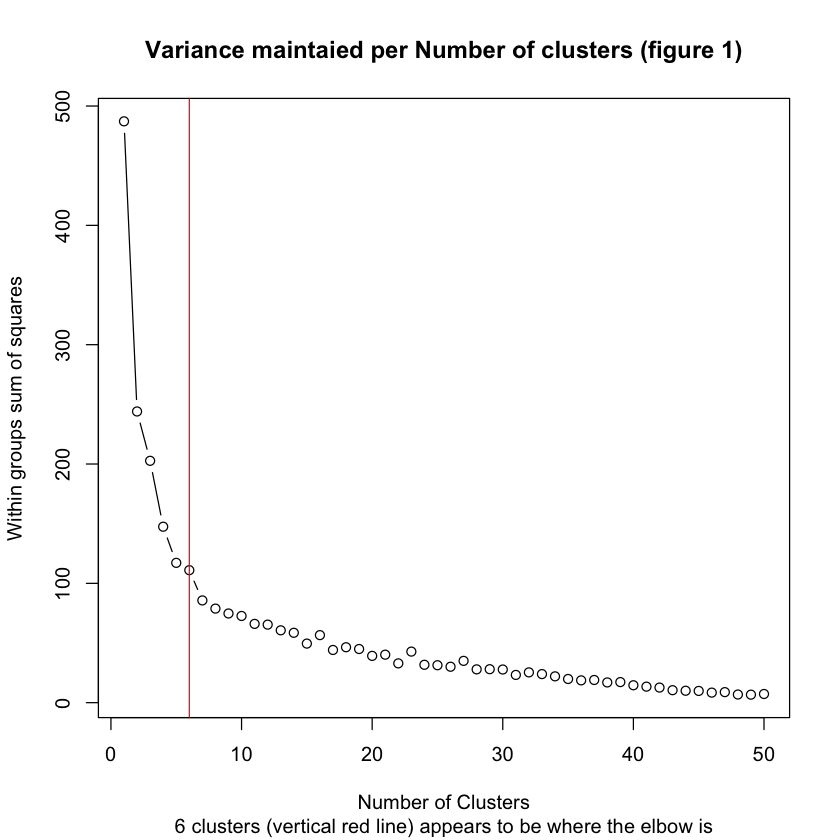

In [107]:
## Plot Variance of Clusters against Number of Clusters
WssPlot <- function(d, numClusters=15, seed=42) {
  # ----------------------------------------------------------------------------
  # Plots 
  # 
  # Args:
  #   d: data in a data frame 
  #   numClusters: (optional) numeric integer, number of clusters, defaults to 15
  #   seed: (optional) set seed for kmeans function
  # Returns:
  #   numeric vector of within group sum of squares, index values represent 
  #     number of clusters
  # ----------------------------------------------------------------------------
  wss <- (nrow(d)-1) * sum(apply(d,2,var)) 
  for (i in 2:numClusters) {
      set.seed(seed)
      wss[i] <- sum(kmeans(d, centers=i)$withinss)
  }
  plot(
      1:numClusters, wss, type="b", 
      xlab="Number of Clusters",
      ylab="Within groups sum of squares", 
      main="Variance maintaied per Number of clusters (figure 1)",
      sub="6 clusters (vertical red line) appears to be where the elbow is"
      )
  abline(v=6, col="red")  # 

  return(wss)
}

sessionsWss <- WssPlot(d, numClusters=50)

In [66]:
## K-means Clustering with 6 clusters
numClusters <- 6
sessionClusters <- kmeans(d, centers = numClusters, iter.max = 100, nstart = 100)

## Final Cluster Centers
sessionClusters$centers
print(paste("Table 1"))

,Home,Products,Search,Prod_A,Prod_B,Prod_C,Cart,Purchase,cluster
1,0.70,0.65,0.25,0.95,0.50,0.00,1.00,0.95,3.00
2,0.1428571,1.0000000,0.5238095,0.0000000,1.0000000,0.5714286,0.1904762,0.0000000,2.0000000
3,0.90,0.70,0.60,1.00,0.40,1.00,0.75,0.35,6.00
4,1.00000000,0.50000000,0.92857143,0.07142857,0.14285714,0.28571429,0.71428571,0.28571429,4.00000000
5,0.0,1.0,0.1,0.0,1.0,0.9,1.0,0.9,5.0
6,0.73333333,0.46666667,0.06666667,0.86666667,0.26666667,0.00000000,0.13333333,0.00000000,1.00000000


[1] "Table 1"


,FullData,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,Cluster6
Home,0.6,0.733,0.143,0.7,1,0,0.9
Products,0.72,0.467,1,0.65,0.5,1,0.7
Search,0.43,0.0667,0.524,0.25,0.929,0.1,0.6
Prod_A,0.53,0.867,0,0.95,0.0714,0,1
Prod_B,0.55,0.267,1,0.5,0.143,1,0.4
Prod_C,0.45,0,0.571,0,0.286,0.9,1
Cart,0.61,0.133,0.19,1,0.714,1,0.75
Purchase,0.39,0,0,0.95,0.286,0.9,0.35


[1] "Cluster Summary (Table 2)"


Warning message:
In heatmap.2(as.matrix(sessions.clusterSummary), Rowv = F, Colv = F, : Discrepancy: Rowv is FALSE, while dendrogram is `both'. Omitting row dendogram.Warning message:
In heatmap.2(as.matrix(sessions.clusterSummary), Rowv = F, Colv = F, : Discrepancy: Colv is FALSE, while dendrogram is `column'. Omitting column dendogram.

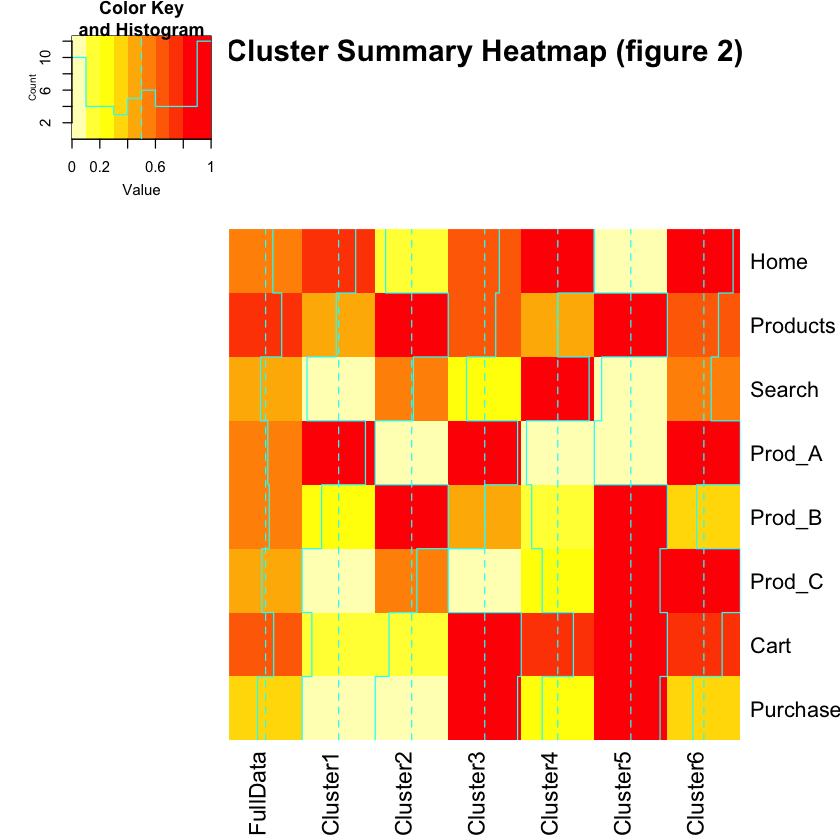

In [75]:
ClusterSummary <- function (d, clusterCol) {
  # ----------------------------------------------------------------------------
  # Args:
  #   d: data encapsulated in a data frame including a column with cluster 
  #     labels for each row
  #   clusterCol: numeric value indicating which column of `d` contains the 
  #     cluster lables
  # Returns:
  #   data frame representing cluster summary. first column is list of data 
  #   attributes, second column full data summary per attribute row, subsequent 
  #   columns cluster summaries
  # ----------------------------------------------------------------------------
  attrs <- names(d[ ,-clusterCol])
  k <- length(unique(d[ ,clusterCol]))
  
  clusterSummary <- data.frame(
    FullData = sapply(attrs, function(attr) mean(d[,attr]))
  )
  
  temp <- as.data.frame(sapply(1:k, function(cluster) {
    #column <- paste("Cluster",cluster, sep=""); clusterSummary[,column] <- 
    sapply(attrs, function(attr) {
      mean(d[,attr][d[,clusterCol]==cluster])
    })
  }))
  
  names(temp) <- sapply(1:k, function(cluster) { 
    paste("Cluster",cluster, sep="") 
  })
  
  clusterSummary <- cbind(clusterSummary, temp)
  
  return(clusterSummary)
}



sessions.clusterSummary <- signif(ClusterSummary(d, clusterCol = 9), 3)
sessions.clusterSummary
print(paste("Cluster Summary (Table 2)"))                     

heatmap.2(
  as.matrix(sessions.clusterSummary), 
  Rowv = F, Colv = F, 
  offsetRow = 0, offsetCol = 0, 
  col = rev(heat.colors(10)),
  main = "Cluster Summary Heatmap (figure 2)"
  )

In [74]:
# Write to CSV data set w/ Cluster lables
write.csv(d, file = "Sessions_clusters.csv")

## Write cluster centers to file
write.csv(sessionClusters$centers, "sessions_cluster_centers.csv")

## Write Cluster summary to file
write.csv(sessions.clusterSummary, "sessions_cluster_summary.csv")

sigma summary: Min. : 0.5978 |1st Qu. : 0.7804 |Median : 0.9719 |Mean : 0.9048 |3rd Qu. : 1.02 |Max. : 1.085 |
Epoch: Iteration #100 error is: 13.8423016155955
Epoch: Iteration #200 error is: 1.3521035120348
Epoch: Iteration #300 error is: 1.27947922581357
Epoch: Iteration #400 error is: 1.10413431557958
Epoch: Iteration #500 error is: 0.941237401638035
Epoch: Iteration #600 error is: 0.754658785584018
Epoch: Iteration #700 error is: 0.604714350754002
Epoch: Iteration #800 error is: 0.498583725185264
Epoch: Iteration #900 error is: 0.473665792882499
Epoch: Iteration #1000 error is: 0.46155203206901


[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

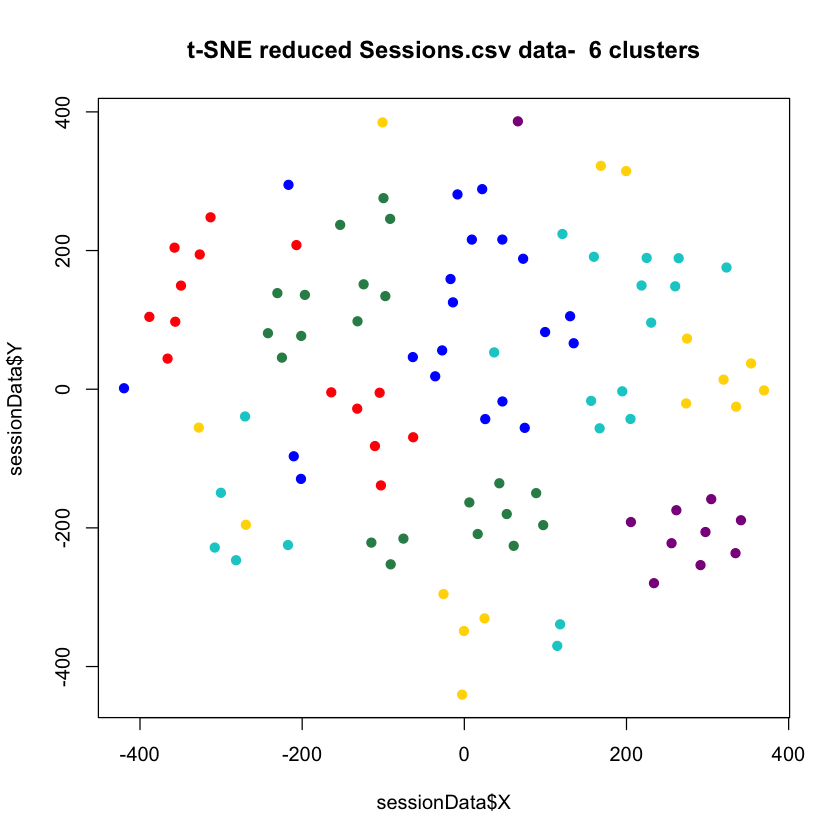

In [32]:
## tSNE reduction
tsne_sessions = tsne(d, initial_dims=8, k=2)

            #    1       2           3        4        5             6              7            8            9       10
myColors <- c("red", "blue", "seagreen", "cyan3", "gold", "darkmagenta", "darkorange", "deeppink2", "seagreen2", "yellow")

## visualize
sessionData <- as.data.frame(tsne_sessions)
names(sessionData) <- c("X", "Y")
sessionData$clust <- sessionClusters$cluster

plot(sessionData$X, sessionData$Y, type="n", 
     main = paste("t-SNE reduced Sessions.csv data- ", numClusters, "clusters"))
sapply(1:numClusters, function (clusterIndex) {
  points(
    sessionData$X[sessionData$clust==clusterIndex], 
    sessionData$Y[sessionData$clust==clusterIndex],
    pch = 19,
    col = myColors[clusterIndex])
})
